# Import Library

In [ ]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve

# Read Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the Excel file, skipping the first row and using the second row as the header
data = pd.read_excel("/content/drive/MyDrive/dataset/default of credit card clients.xls", skiprows=1, header=0)

In [ ]:
data["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Attribute Information:**

[default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients )

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [ ]:
# rename target columns
data.rename(columns={"default payment next month": "is_default"}, inplace=True)

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'is_default'],
      dtype='object')

In [ ]:
# Remove data columns
data.drop(columns=['ID'], inplace=True)

In [ ]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# EDA


## Distribution of Features using countplot


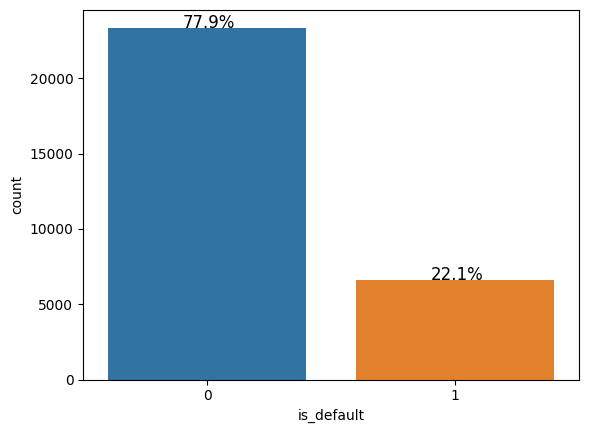

In [ ]:
# Create a countplot
ax = sns.countplot(x='is_default', data=data)

# Get total number of data points
total = data.shape[0]

# Calculate and add percentage text above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()

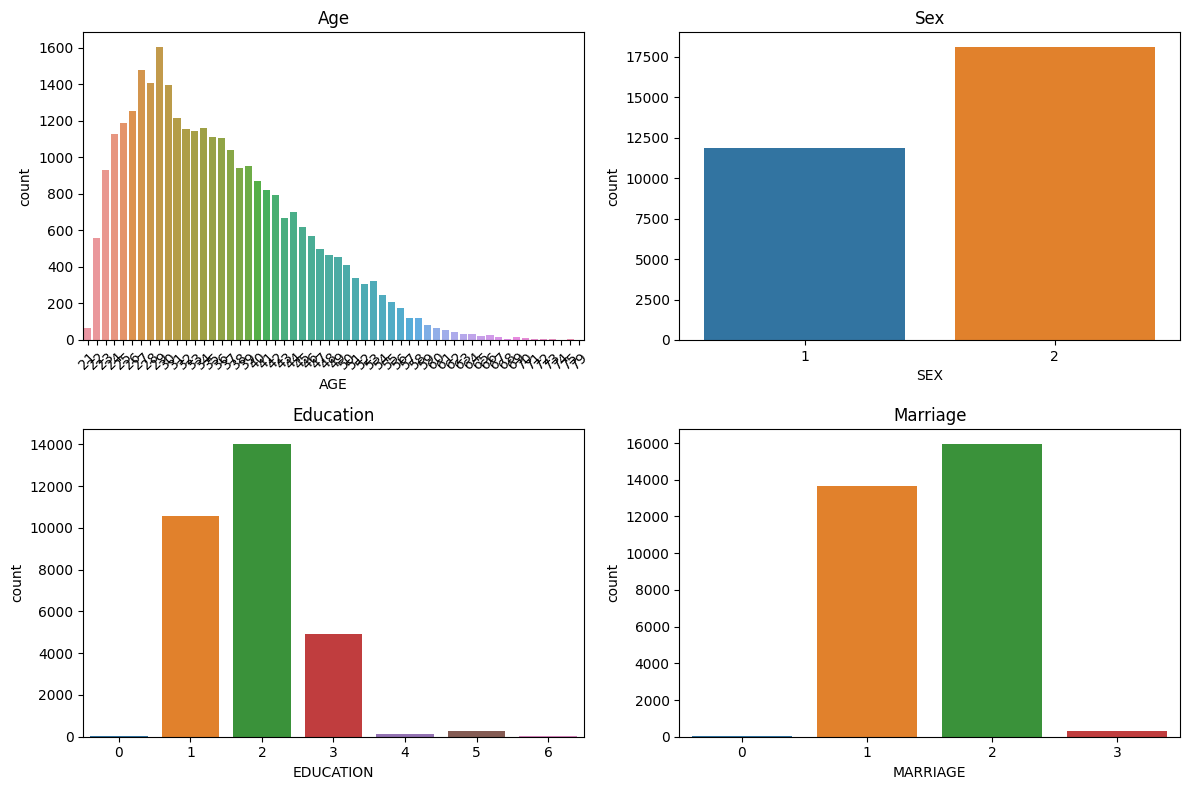

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Distribution of 'default payment next month' variable
sns.countplot(ax=axes[0, 0], x='AGE', data=data)
axes[0, 0].set_title('Age')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Distribution of 'SEX' variable
sns.countplot(ax=axes[0, 1], x='SEX', data=data)
axes[0, 1].set_title('Sex')

# Distribution of 'EDUCATION' variable
sns.countplot(ax=axes[1, 0], x='EDUCATION', data=data)
axes[1, 0].set_title('Education')

# Distribution of 'MARRIAGE' variable
sns.countplot(ax=axes[1, 1], x='MARRIAGE', data=data)
axes[1, 1].set_title('Marriage')

plt.tight_layout()
plt.show()

## Feature Distribution using hist plot

## Categorical Feature relation with is_default





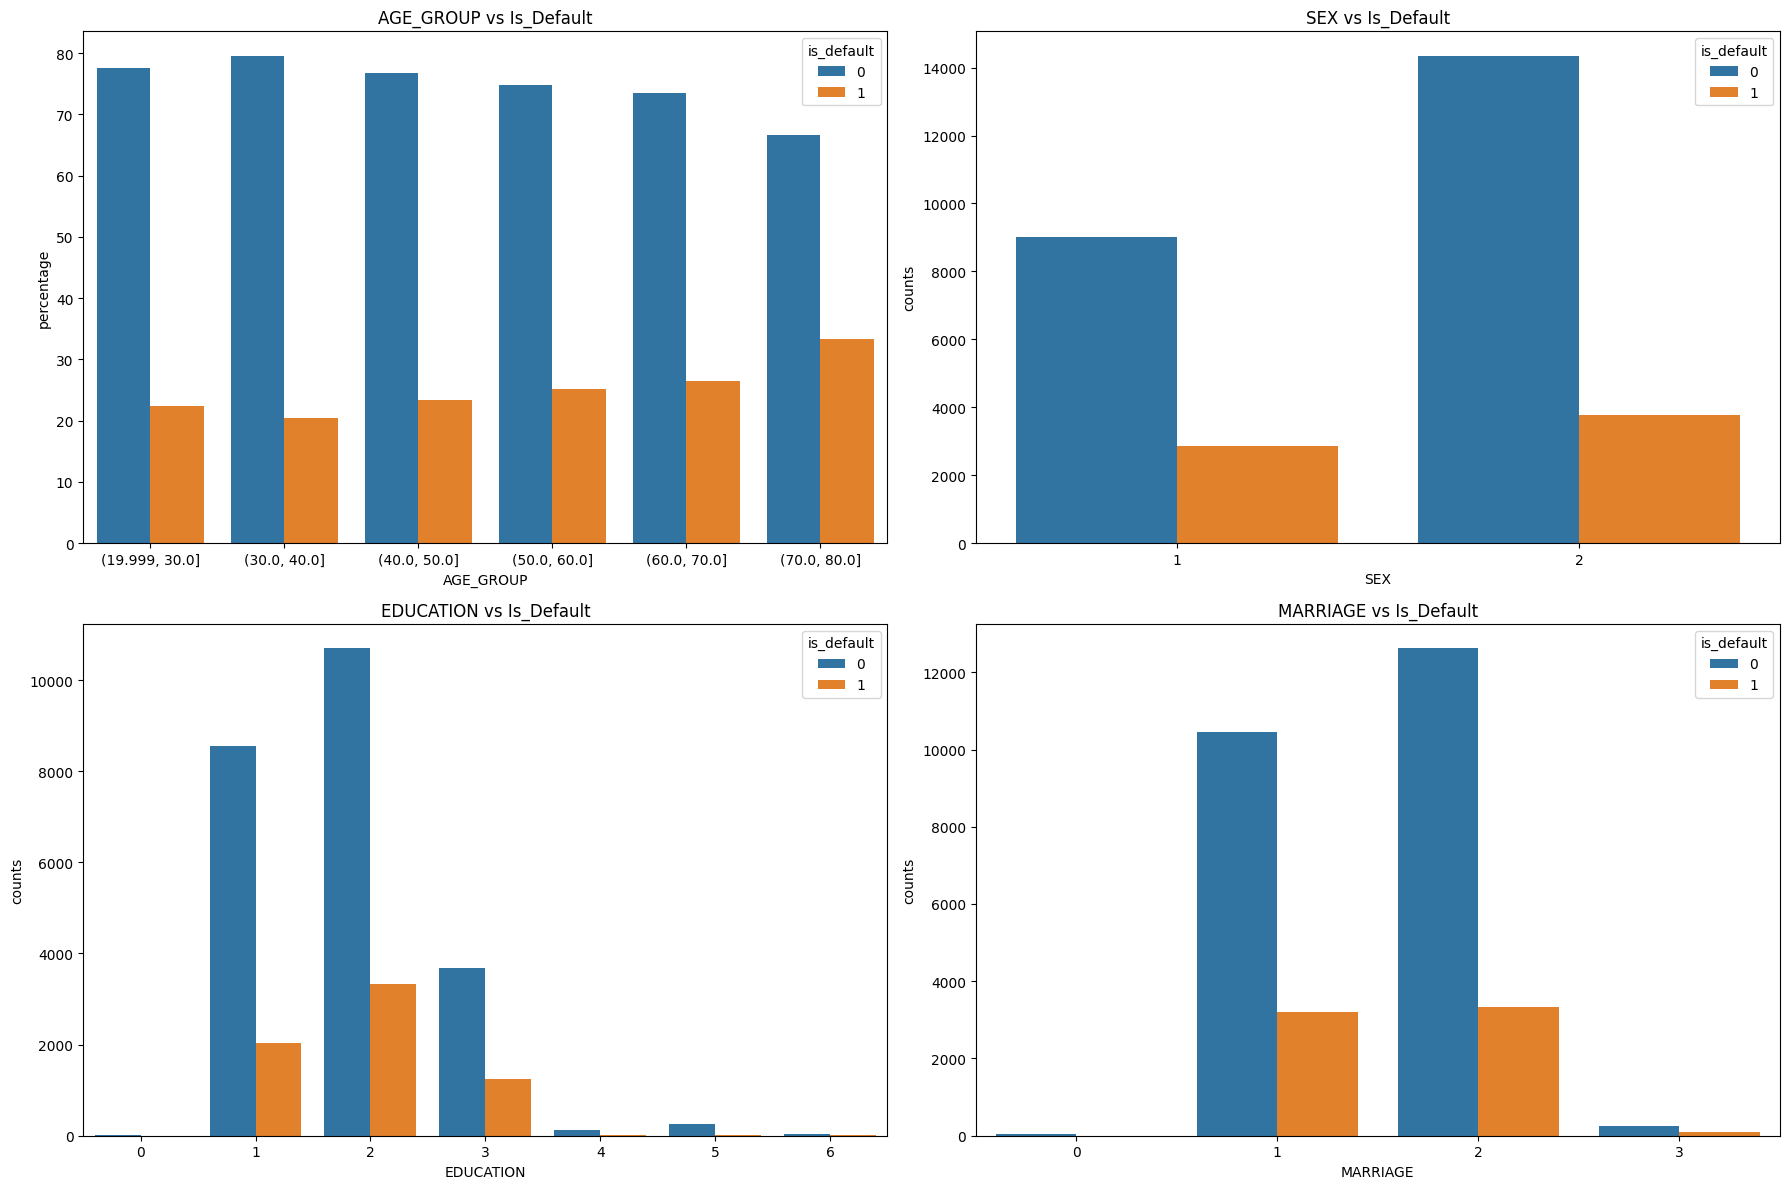

In [ ]:
# Create a 2x2 grid of subplots in a single figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Bucketize age into groups
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[20, 30, 40, 50, 60, 70, 80], include_lowest=True)

# Grouped bar chart for 'AGE_GROUP' and 'is_default'
age_group_counts = data.groupby(['AGE_GROUP', 'is_default']).size().reset_index(name='counts')

# Calculate the total counts for each age group
age_group_totals = age_group_counts.groupby('AGE_GROUP').sum().reset_index().rename(columns={"counts": "total_counts"})

age_group_totals = age_group_totals[["AGE_GROUP", "total_counts"]]

# Merge the total counts back to the original dataframe
age_group_counts = pd.merge(age_group_counts, age_group_totals, on='AGE_GROUP')


# Calculate the percentage within each age group
age_group_counts['percentage'] = 100 * age_group_counts['counts'] / age_group_counts['total_counts']


# Grouped bar chart for 'AGE_GROUP' and 'is_default'
#age_group_counts = data.groupby(['AGE_GROUP', 'is_default']).size().reset_index(name='counts')
sns.barplot(ax=axes[0, 0], x='AGE_GROUP', y='percentage', hue='is_default', data=age_group_counts)
axes[0, 0].set_title('AGE_GROUP vs Is_Default')

# Grouped bar chart for 'SEX' and 'is_default'
sex_counts = data.groupby(['SEX', 'is_default']).size().reset_index(name='counts')
sns.barplot(ax=axes[0, 1], x='SEX', y='counts', hue='is_default', data=sex_counts)
axes[0, 1].set_title('SEX vs Is_Default')

# Grouped bar chart for 'EDUCATION' and 'is_default'
education_counts = data.groupby(['EDUCATION', 'is_default']).size().reset_index(name='counts')
sns.barplot(ax=axes[1, 0], x='EDUCATION', y='counts', hue='is_default', data=education_counts)
axes[1, 0].set_title('EDUCATION vs Is_Default')

# Grouped bar chart for 'MARRIAGE' and 'is_default'
marriage_counts = data.groupby(['MARRIAGE', 'is_default']).size().reset_index(name='counts')
sns.barplot(ax=axes[1, 1], x='MARRIAGE', y='counts', hue='is_default', data=marriage_counts)
axes[1, 1].set_title('MARRIAGE vs Is_Default')

plt.tight_layout()
plt.show()

## Corelation Heatmap of Numerical variable

<ipython-input-33-d246e3130731>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


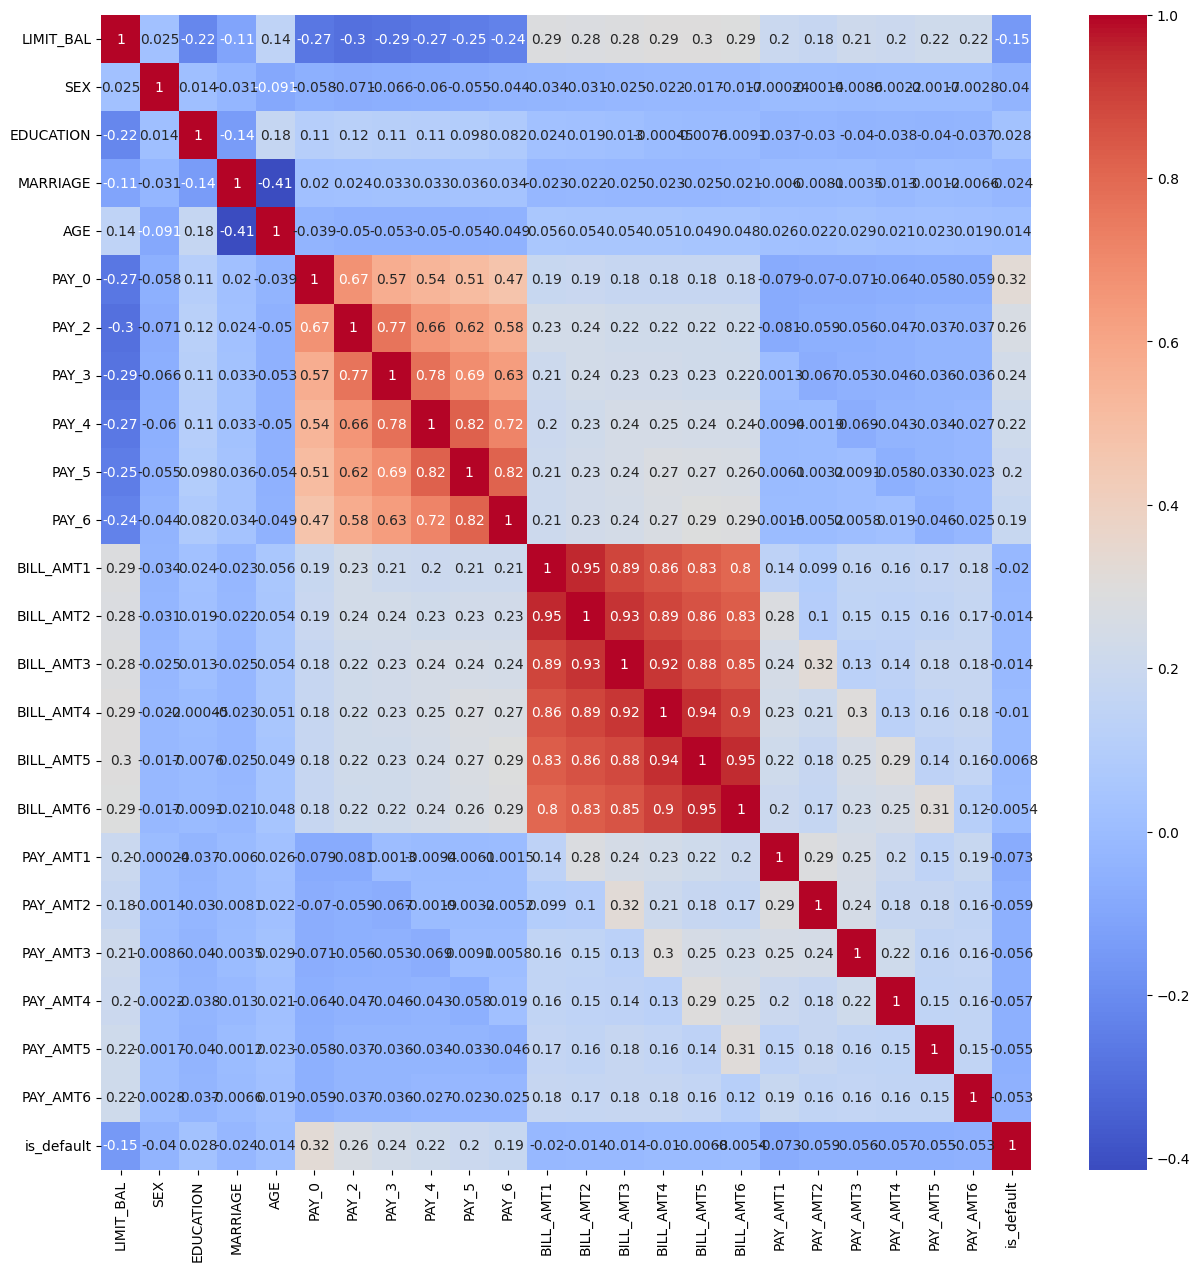

In [ ]:
corr = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

# Feature Engineering

## Categorical Feature Handling

In [ ]:
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[20, 30, 40, 50, 60, 70, 80], include_lowest=True)
features = data.drop(["is_default", "AGE"], axis=1)
cat_feat = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP']
features_encoded = pd.get_dummies(features, columns=cat_feat)

## Feature Scaling




In [ ]:
features_encoded.columns

Index(['ID', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'AGE_GROUP_(19.999, 30.0]', 'AGE_GROUP_(30.0, 40.0]',
       'AGE_GROUP_(40.0, 50.0]', 'AGE_GROUP_(50.0, 60.0]',
       'AGE_GROUP_(60.0, 70.0]', 'AGE_GROUP_(70.0, 80.0]'],
      dtype='object')

In the context of logistic regression, scaling is important because:

1. Convergence: Logistic regression uses gradient-based optimization algorithms to find the coefficients that minimize the loss function. If features have different scales, the algorithm may take longer to converge, or it may not converge at all.

2. Interpretability: Scaling can help make the coefficients of logistic regression more interpretable. When features are on the same scale, the magnitude of the coefficients can be compared to understand the importance of each feature.

3. Regularization: Logistic regression can be extended with regularization techniques such as Lasso (L1) or Ridge (L2), which penalize large coefficients to prevent overfitting. When features have different scales, the regularization will disproportionately affect features with smaller magnitudes, leading to biased feature selection or model performance.

In [ ]:
# Feature scaling
continuous_features = ['LIMIT_BAL', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
scaler = StandardScaler()
features_encoded[continuous_features] = scaler.fit_transform(features_encoded[continuous_features])

# Model Training

In [ ]:
features = data.drop(["is_default"], axis=1)

target = data["is_default"]

In [ ]:
feat = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
features = features[feat]

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create a logistic regression model
#max_iterint, default=100
# Maximum number of iterations taken for the solvers to converge
# max_iter=2000` means that the solver will try to converge within 2000 iterations.
# If it doesn't converge within this limit, the optimization will stop,
# and the model may not be fully optimized.
logistic_regression = LogisticRegression(max_iter=2000, solver='lbfgs')

# Fit the model to the train set
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)


In the absence of proper handling of categorical features, the logistic regression model may not converge and may predict the majority class as the output. This highlights the importance of understanding that real-life datasets are often imbalanced, and data science or machine learning is not just about applying libraries. If one does not preprocess the data correctly and handle various aspects of the dataset, they may end up with unexpected or unreliable results.

Categorical features require appropriate preprocessing, such as one-hot encoding or target encoding, to ensure they are correctly represented in the model. Imbalanced datasets may need resampling techniques, such as oversampling the minority class or undersampling the majority class, to improve the model's performance on the minority class.

In [ ]:
# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, F1-score, and AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)

Accuracy:  0.7822222222222223
Precision:  0.0
Recall:  0.0
F1-score:  0.0
AUC:  0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## With Categorical Features Handling

In [ ]:
features_encoded.columns , len(features_encoded.columns)

(Index(['ID', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
        'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
        'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1',
        'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
        'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
        'AGE_GROUP_(19.999, 30.0]', 'AGE_GROUP_(30.0, 40.0]',
        'AGE_GROUP_(40.0, 50.0]', 'AGE_GROUP_(50.0, 60.0]',
        'AGE_GROUP_(60.0, 70.0]', 'AGE_GROUP_(70.0, 80.0]'],
       dtype='object'),
 39)

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_regression = LogisticRegression(max_iter=2000, class_weight="balanced")

# Fit the model to the train set
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)


In [ ]:
# Calculate the accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, F1-score, and AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)

Accuracy:  0.634
Precision:  0.32986512524084777
Recall:  0.6519421172886519
F1-score:  0.43807574206755373
AUC:  0.64045793724471


6000


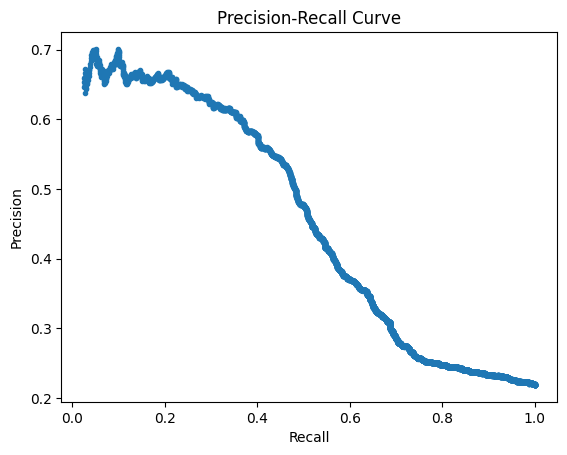

In [ ]:
# Calculate the probability of the target class (class 1)
y_prob = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
print(len(thresholds))
# Plot the Precision-Recall curve
plt.plot(recall[:-50], precision[:-50], marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


 `class_weight="balanced"`: This option in scikit-learn's logistic regression assigns different weights to the classes based on their frequency in the dataset. The less frequent class (minority) will have a higher weight, and the more frequent class (majority) will have a lower weight. This means that during the training process, the model will put more emphasis on correctly classifying instances of the minority class, thus addressing the class imbalance issue. This method does not require removing any instances from the dataset, so it retains all the available information.



# HyperParameter Tuning

for parameter referes https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html




1. `'C'`: This parameter represents the inverse of regularization strength. Smaller values of `C` result in stronger regularization, which can help prevent overfitting by penalizing large coefficients in the model.

2. `'penalty'`: This parameter determines the type of regularization to be applied to the model. Regularization is used to prevent overfitting by penalizing large coefficients in the model. The `'l2'` penalty, also known as Ridge regularization, adds the squared magnitude of the coefficients to the loss function. In this case, you have specified only the `'l2'` penalty.

3. `'solver'`: This parameter specifies the optimization algorithm to be used for training the logistic regression model. Different solvers have different performance characteristics and may be more suitable for specific types of datasets or problems. In this case, you have specified five solvers:

   - `'newton-cg'`: Newton Conjugate Gradient, a second-order optimization method that approximates the Hessian matrix for efficient optimization. Suitable for large datasets and supports L2 regularization.
   - `'lbfgs'`: Limited-memory Broyden-Fletcher-Goldfarb-Shanno, a quasi-Newton method that also approximates the Hessian matrix. Suitable for small to moderately-sized datasets and supports L2 regularization. It is the default solver in scikit-learn.
   - `'liblinear'`: A linear solver that uses the coordinate gradient descent algorithm. Suitable for smaller datasets and supports both L1 and L2 regularization. However, it may have slower convergence for large datasets.
   - `'sag'`: Stochastic Average Gradient descent, an optimization algorithm that uses a random sample of the data at each iteration. Suitable for large datasets and supports L2 regularization.
   - `'saga'`: Stochastic Average Gradient descent with support for both L1 and L2 regularization. Suitable for large datasets and sparse data.

In [ ]:
# Separate positive and negative examples
positive_examples = features_encoded[target == 1]
negative_examples = features_encoded[target == 0]


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Set up hyperparameter grid for tuning
param_grid = {
    #'C': [0.01, 0.05 , 0.1, 0.2 , 0.3 , 0.4],
    'C': [0.01],
    #'penalty': ['l2', 'l1'],
    'penalty': ['l2'],
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    'solver': ['lbfgs', 'newton-cg'],
    'max_iter': [1000, 5000, 10000, 15000],
    'class_weight': [None, 'balanced']
}

# Custom iterator for tqdm progress tracking
cv = KFold(n_splits=5)
cv_splits = list(cv.split(X_train, y_train))

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logistic_regression, param_grid, scoring='f1', cv=cv, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters from grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters: ", best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy, precision, recall, F1-score, and AUC
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, F1-score, and AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("AUC: ", auc)

Accuracy:  0.6938333333333333
Precision:  0.38198198198198197
Recall:  0.6458492003046459
F1-score:  0.48004528729125384
AUC:  0.6765623215092677
